# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix


from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Reading Data

In [ ]:
data = pd.read_csv('/data/jkuat_students.csv')
print(data.shape)
data.head()

(960, 54)


,studentId,school,year,semeseter,cs01,cs02,cs03,cs04,cs05,cs06,...,time_spent,ai_industry,cs_industry,da_industry,gd_industry,ho_industry,is_industry,na_industry,sd_industry,specialisation
0,1010,JKUAT,1,1,31.71,21.00,50,13.80,5.58,0.0,...,0,0,0,0,0,0,0,0,0,AI
1,1011,JKUAT,1,1,31.04,20.39,50,12.82,5.52,0.0,...,0,0,0,0,0,0,0,0,0,AI
2,1012,JKUAT,1,1,32.99,20.49,50,13.36,5.81,0.0,...,0,0,0,0,0,0,0,0,0,AI
3,1013,JKUAT,1,1,24.88,15.60,40,10.97,4.34,0.0,...,0,0,0,0,0,0,0,0,0,AI
4,1014,JKUAT,1,1,26.47,16.64,40,9.67,4.70,0.0,...,0,0,0,0,0,0,0,0,0,AI


# Data Visualisation

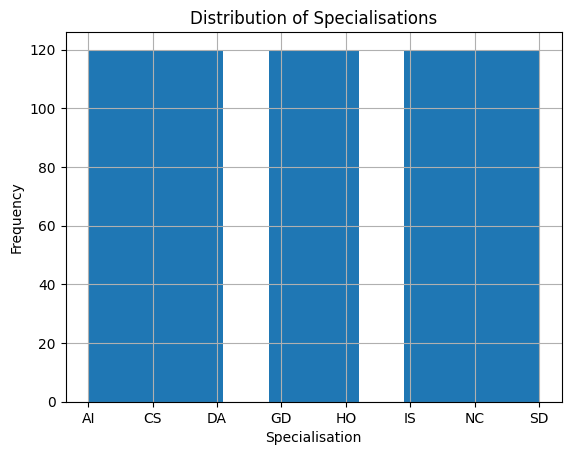

In [ ]:
# Plot a histogram of the target variable
plt.figure(figsize=(10,5))
plt.hist(data['specialization'], bins=5)
plt.title("Distribution of Specializations")
plt.xlabel("Specializations")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Plot a scatterplot matrix of the variables
pd.plotting.scatter_matrix(data, figsize=(12, 12))
plt.show()

# Modelling

In [ ]:
# Split the dataset into features and target variable
X = data.drop(['specialisation', 'school'], axis=1)
y = data['specialisation']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Encode the target variable
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

## Random Forest Classifier

In [ ]:
# Train a random forest classifier
model_rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
# Evaluate the model on the testing set
accuracy = accuracy_score(X_test, y_test)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(X_test, y_test))

Accuracy: 0.96


In [ ]:
# Feature Importance plot
importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]

In [ ]:
# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

# Make specialisation predictions on the test data

In [ ]:
preds = model_rf.predict(X_test)
preds

array([6, 3, 2, 7, 7, 2, 1, 2, 0, 7, 4, 0, 1, 7, 4, 4, 0, 3, 6, 7, 7, 0,
       6, 2, 6, 0, 1, 3, 7, 0, 5, 0, 5, 1, 6, 5, 2, 0, 1, 7, 4, 0, 5, 5,
       1, 7, 2, 1, 6, 5, 7, 7, 2, 2, 3, 4, 1, 5, 5, 0, 2, 1, 6, 1, 2, 3,
       0, 6, 4, 4, 6, 5, 5, 2, 5, 3, 0, 5, 1, 7, 2, 4, 3, 2, 4, 5, 6, 5,
       0, 5, 3, 6, 4, 6, 2, 4, 6, 0, 4, 0, 4, 1, 7, 2, 3, 4, 2, 5, 2, 2,
       2, 2, 5, 5, 2, 5, 5, 4, 7, 6, 4, 7, 0, 7, 7, 3, 6, 0, 7, 3, 4, 4,
       7, 3, 6, 2, 0, 3, 6, 2, 3, 4, 1, 3, 7, 4, 3, 5, 1, 4, 3, 7, 5, 5,
       4, 3, 7, 4, 7, 0, 7, 6, 4, 3, 5, 4, 3, 0, 1, 1, 3, 5, 5, 2, 2, 1,
       6, 2, 0, 5, 1, 4, 6, 7, 4, 2, 7, 3, 5, 0, 0, 5])

In [ ]:
# Compute specialisation compatibility scores
probs = model_rf.predict_proba(X_test)
# Convert the encoded labels back to original labels
preds = encoder.inverse_transform(preds)

# Print the predicted specialization and compatibility scores for each specialization
for spec, prob in zip(encoder.classes_, probs[0]):
    print(f'{spec}: {prob:.2f}')

AI: 0.02
CS: 0.13
DA: 0.02
GD: 0.02
HO: 0.18
IS: 0.03
NC: 0.60
SD: 0.01
